# **Classical Algorithm: Bayesian Regression**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt

In [ ]:
# 1. Mount the dataset
dataset_path = '/content/drive/MyDrive/MiniProject_BlackHoleMassEstimation/typeII_AGN_metadata.csv'
data = pd.read_csv(dataset_path)

In [ ]:
# 2. Define target column and features
target_column = 'log_bh_mass'
features = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
    'h_alpha_flux', 'h_alpha_flux_err', 'nii_6584_flux', 'nii_6584_flux_err',
    'log_stellar_sigma', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
    'psfMag_z', 'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i',
    'psfMagErr_z', 'mendel_logM_p50', 'mendel_logM_p16', 'mendel_logM_p84',
    'mendel_logMt_p50', 'mendel_logMt_p16', 'mendel_logMt_p84',
    'mendel_logMb_p50', 'mendel_logMb_p16', 'mendel_logMb_p84',
    'mendel_logMd_p50', 'mendel_logMd_p16', 'mendel_logMd_p84', 'simard_b_t_g',
    'simard_e_b_t_g', 'simard_b_t_r', 'simard_e_b_t_r', 'simard_Rhlg',
    'simard_Rhlr', 'simard_Rchl_g', 'simard_Rchl_r', 'simard_Re', 'simard_e_Re',
    'simard_e', 'simard_e_e', 'simard_nb', 'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]

In [ ]:
# 6. Handle missing/NaN values with mean imputation
imputer = SimpleImputer(strategy='mean')
data[features] = imputer.fit_transform(data[features])
data[target_column] = imputer.fit_transform(data[[target_column]])

# 3. Normalize the features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

X = data[features]
y = data[target_column]

In [ ]:
# 5. Run the algorithm with 5-fold validation with 80:20 train-test
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []
mae_scores = []
rmse_scores = []
mse_scores = []
accuracy_mae = []
accuracy_mse = []
accuracy_rmse = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Bayesian Regression model
    model = BayesianRidge()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate error metrics
    r2_scores.append(r2_score(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

    # Calculate accuracy by error
    range_y = y_test.max() - y_test.min()
    accuracy_mae.append((1 - mae / range_y) * 100)
    accuracy_mse.append((1 - mse / range_y) * 100)
    accuracy_rmse.append((1 - rmse / range_y) * 100)

In [ ]:
# 4. Print error metrics with standard deviation and accuracy
print(f'R²: {-np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}')
print(f'MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f} (Accuracy: {np.mean(accuracy_mae):.2f}%)')
print(f'MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f} (Accuracy: {np.mean(accuracy_mse):.2f}%)')
print(f'RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f} (Accuracy: {np.mean(accuracy_rmse):.2f}%)')

R²: 0.0774 ± 1.0455
MAE: 0.3874 ± 0.0104 (Accuracy: 90.84%)
MSE: 0.4403 ± 0.4334 (Accuracy: 90.20%)
RMSE: 0.6069 ± 0.2683 (Accuracy: 86.02%)


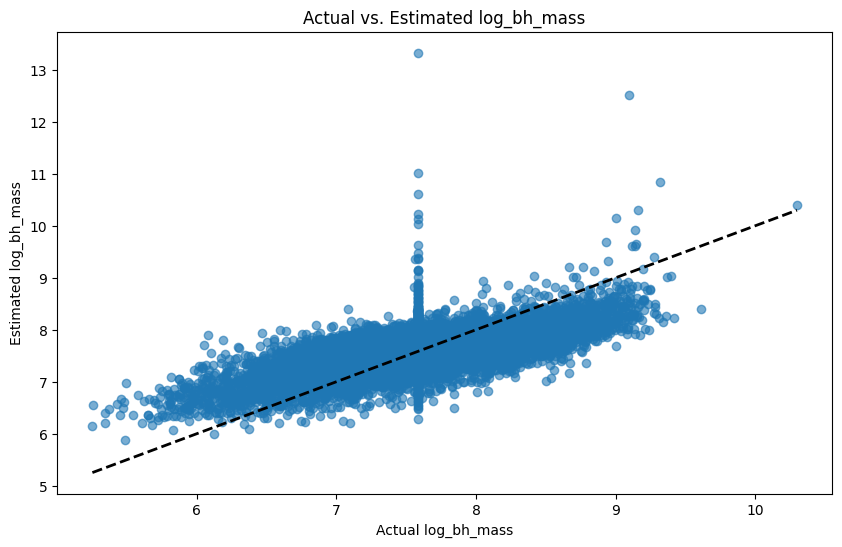

In [ ]:
# 7. Plot a graph between actual log_bh_mass and estimated log_bh_mass
model.fit(X, y)  # Train on the entire dataset for plotting
y_pred_full = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_full, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual log_bh_mass')
plt.ylabel('Estimated log_bh_mass')
plt.title('Actual vs. Estimated log_bh_mass')
plt.show()